<a href="https://colab.research.google.com/github/Anion666/ML---Everlytics-/blob/main/phising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# phising website detection 





## **1 Objective** 
Build a model that predicts whether a website is a phising website. 


In [1]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install numpy --upgrade
!pip install scipy --upgrade
!pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2 Importing and Loading the data 

In [3]:
# Importing basic packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# Loading the data frame 
df = pd.read_csv('Phishing Data - Phishing Data.csv')

### 3 Understanding the data 

Here I am using a few dataframe methods to look into the data for features  

In [5]:
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,0,-1,0,0,0,0,0,-1,1,0,...,0,0,-1,0,1,0,0,0,0,1
2452,0,-1,0,1,0,0,0,0,1,0,...,0,0,0,1,-1,0,0,1,0,1
2453,0,-1,0,0,0,0,0,1,0,0,...,0,0,-1,0,1,0,0,0,0,0
2454,0,-1,0,0,0,0,-1,-1,1,0,...,0,0,1,0,-1,-1,0,0,0,1


In [6]:
df.tail()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
2451,0,-1,0,0,0,0,0,-1,1,0,...,0,0,-1,0,1,0,0,0,0,1
2452,0,-1,0,1,0,0,0,0,1,0,...,0,0,0,1,-1,0,0,1,0,1
2453,0,-1,0,0,0,0,0,1,0,0,...,0,0,-1,0,1,0,0,0,0,0
2454,0,-1,0,0,0,0,-1,-1,1,0,...,0,0,1,0,-1,-1,0,0,0,1
2455,0,-1,0,0,0,0,0,1,0,0,...,0,0,-1,0,1,1,0,0,0,0


In [7]:
df.shape

(2456, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

After getting features about the data and information about it. We want to make sure if the data set contains NAN( Not a number). Hence we use isnull to identify whether there are any rows that might posses them. 


In [9]:
df.isnull()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2452,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2453,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2454,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


From the above execution, it is clear that the data does not have any missing values.

## Now we use the Pearson correaltion method by using corr() function to find the correlation among the columns in the Dataframe and also check for similarities between different columns which can give us a better idea on what to visualize. 

In [10]:
df.corr()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1.000000,0.103582,0.946315,-0.085825,0.920203,0.108087,0.018615,0.043557,-0.098534,0.030326,...,0.049965,0.028537,0.050481,0.228888,0.106839,-0.016420,-0.047548,0.244556,0.215134,-0.061623
URL_Length,0.103582,1.000000,0.119039,0.069272,0.101536,0.068191,-0.012365,0.041580,-0.326758,0.045295,...,0.053432,0.012847,0.014283,0.051523,0.024704,0.000726,-0.026701,-0.007836,0.084554,-0.055605
Shortining_Service,0.946315,0.119039,1.000000,-0.068114,0.876519,0.111831,0.027941,0.052711,-0.089549,0.014858,...,0.045988,0.018059,0.056724,0.241016,0.095182,-0.027334,-0.043555,0.213561,0.219520,-0.061175
having_At_Symbol,-0.085825,0.069272,-0.068114,1.000000,-0.090966,0.026929,0.001966,-0.004449,-0.001145,-0.116249,...,-0.118706,-0.076476,0.035179,-0.107532,-0.066232,0.038937,-0.029553,-0.088749,-0.102878,0.008336
double_slash_redirecting,0.920203,0.101536,0.876519,-0.090966,1.000000,0.106398,0.020216,0.031330,-0.092049,0.048790,...,0.066721,0.015559,0.037953,0.233517,0.112327,-0.015349,-0.046161,0.202975,0.207816,-0.042536
Prefix_Suffix,0.108087,0.068191,0.111831,0.026929,0.106398,1.000000,0.115494,0.372453,-0.139030,-0.020312,...,-0.010835,0.011677,0.178187,-0.070127,0.241684,0.219008,-0.164327,0.069498,0.012800,-0.537020
having_Sub_Domain,0.018615,-0.012365,0.027941,0.001966,0.020216,0.115494,1.000000,0.259734,-0.049267,-0.017455,...,0.007021,-0.031687,0.338584,-0.061389,0.080901,0.097460,-0.051731,-0.022250,-0.018942,-0.266514
SSLfinal_State,0.043557,0.041580,0.052711,-0.004449,0.031330,0.372453,0.259734,1.000000,-0.219062,0.005514,...,0.003094,-0.002762,0.365856,-0.137868,0.408251,0.277823,-0.137412,-0.012810,-0.023872,-0.712876
Domain_registeration_length,-0.098534,-0.326758,-0.089549,-0.001145,-0.092049,-0.139030,-0.049267,-0.219062,1.000000,-0.065988,...,-0.070668,-0.021585,-0.126950,0.033052,-0.201828,-0.039803,0.071476,0.105951,-0.026921,0.260157
Favicon,0.030326,0.045295,0.014858,-0.116249,0.048790,-0.020312,-0.017455,0.005514,-0.065988,1.000000,...,0.942697,0.643493,0.008309,0.164356,0.079784,-0.032929,-0.024208,0.130500,0.656712,0.005067


## From the above correaltion output we can infer that there are lot of features that have similar correaltion and are almost the same. The next step would be to visualize the correaltion and get better insights about how the features are correlated.

## 4 Visualization of the data 

Using seaborn heatmap, let us create a heatmap of the correlation between the features 

<Figure size 1080x576 with 0 Axes>

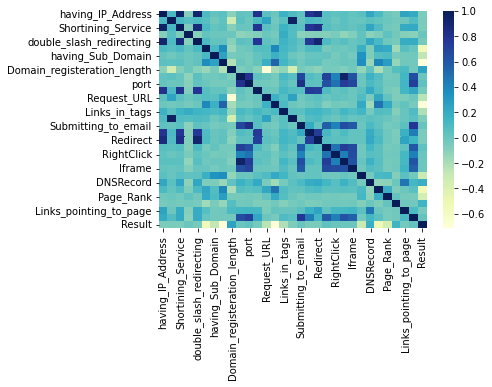

<Figure size 1080x576 with 0 Axes>

In [11]:
#Correlation heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
#sns.set(rc = {'figure.figsize':(15,8)})
plt.figure(figsize = (15,8))

From the above heatmap, we can come to an understanding that the co reation between different Address bar features are similar ie Having IP address and shortening service, Ip address and double slashing and many others. 



#VISUALIZING CO REALTION BETWEEN ADDRESS BAR FEATURES 

In [12]:
#Plotting histogram for Shorting services and IP address 
px.histogram(df, x = "Shortining_Service", y = "having_IP_Address",)

In [13]:
#Plotting histogram of Shorting service and double slash redirecting 
px.histogram(df, x = "Shortining_Service", y = "double_slash_redirecting",)

In [14]:
#Plotting histogram of Ip address and double slash redirecting 
px.histogram(df, x = "having_IP_Address", y = "double_slash_redirecting",)

In [15]:
#Plotting histogram of Ip address and port 
px.histogram(df, x = "having_IP_Address", y = "port",)

In [16]:
#Plotting histogram of Ip address and redirect 
px.histogram(df, x = "having_IP_Address", y = "Redirect",)

#### 5 EDA 

Here I use the describe() function to generate statistics that summarize the data set excluding NaN 

In [17]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,...,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,0.113192,-0.649837,0.122964,0.054560,0.125407,-0.254886,-0.185668,0.255700,0.018730,0.189739,...,0.196254,0.092020,-0.003257,0.536645,0.304560,-0.540717,0.139658,0.344463,0.179153,0.445440
std,0.316892,0.752690,0.328463,0.227166,0.331247,0.676170,0.802068,0.912332,0.798455,0.392175,...,0.397244,0.289112,0.939726,0.498757,0.834146,0.757832,0.346702,0.568911,0.383559,0.497115
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df.isnull().values.any()

False

Now its confirmed that the data does not have any missing values and is ready for Training 

Trying to identify input and output from the data frame 

In [19]:
X = df.drop("Result", axis =1)  # All the columns from Having Ip Address to Statistical Report are the input columns 
Y = df["Result"] # This is the target column which is the output 

In [20]:
X  

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,0,-1,1,-1,-1,0,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,0,-1,1,0,-1,0,1,0
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,0,1,1,-1,0,0,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,0,-1,1,1,-1,0,-1,0
4,0,0,1,0,0,-1,1,1,0,0,...,0,1,0,-1,1,0,-1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,0,-1,0,0,0,0,0,-1,1,0,...,0,0,0,-1,0,1,0,0,0,0
2452,0,-1,0,1,0,0,0,0,1,0,...,0,0,0,0,1,-1,0,0,1,0
2453,0,-1,0,0,0,0,0,1,0,0,...,0,0,0,-1,0,1,0,0,0,0
2454,0,-1,0,0,0,0,-1,-1,1,0,...,0,0,0,1,0,-1,-1,0,0,0


In [21]:
Y

0       1
1       1
2       1
3       1
4       0
       ..
2451    1
2452    1
2453    0
2454    1
2455    0
Name: Result, Length: 2456, dtype: int64

# 6 Splitting the data 
70% for training and 30% for the testing 

SKlearn was used for training and splitting the model and also for prediction because sklearn is an open-source Python library that implements a range of machine learning alogrithms and is very efficient. 
 


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

The reason why this a logistic regression problem is because it is a simple problem of figuring out whether the websites are phising websites or not. 

## 7 Training the Model 

In [23]:
from sklearn.linear_model import LogisticRegression

We are using Saga solver because the data set is large. 

In [24]:
model = LogisticRegression(solver='saga')

Now we start the training of the model. So we take the training data which is 70% of the total data 

In [25]:
model.fit(X_train, Y_train) # We are fitting X_train and Y_train as these are our input and output columns 

LogisticRegression(solver='saga')

Now that the model has been fit, we will predict the output 

In [26]:
train_preds = model.predict(X_train) # model.predict is used for predicting the output 

In [27]:
train_preds

array([0, 0, 1, ..., 1, 0, 1])

In [28]:
model.classes_

array([0, 1])

We use model.predict_proba is to see how close the probability is for YES or NO

In [29]:
train_probs = model.predict_proba(X_train) 
train_probs 

array([[8.26938474e-01, 1.73061526e-01],
       [9.99768119e-01, 2.31881245e-04],
       [4.77875821e-03, 9.95221242e-01],
       ...,
       [7.84012907e-02, 9.21598709e-01],
       [9.87569328e-01, 1.24306719e-02],
       [4.65222077e-05, 9.99953478e-01]])

# We can see above that for the first website the probability for the webiste not being a phising website is 0.8 & the probability for it being a phising website is 0.17 

Now we try to see the accuracy for our training data 

In [30]:
from sklearn.metrics import accuracy_score 
accuracy_score(train_preds, Y_train) # The accuracy is 94% 

0.9429901105293775

# The accuracy is 94% 

Similarly now we train our testing data which has 30% of the data 

In [31]:
model.fit(X_test, Y_test)

LogisticRegression(solver='saga')

In [32]:
test_preds = model.predict(X_test)
test_preds

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [33]:
model.classes_

array([0, 1])

In [34]:
train_probs = model.predict_proba(X_test)
train_probs

array([[9.99242593e-01, 7.57407467e-04],
       [9.20053587e-01, 7.99464134e-02],
       [6.69378394e-01, 3.30621606e-01],
       ...,
       [4.48927879e-03, 9.95510721e-01],
       [1.54940122e-02, 9.84505988e-01],
       [9.99183392e-01, 8.16607848e-04]])

In [35]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(test_preds, Y_test) # the accuracy for the test data is 94% 
accuracy


0.9511533242876526

# the accuracy for the test data is 94% 

The reason why we use confusion matrix is to see how many times the prediction that we get is truly positive or truly negative. 

Meaning, how many times the prediction that we get for a particular website is actually matching with the given test results 

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, test_preds, normalize='true') # For 95% of the time the website that we get is not a phisng website & 94% of the time the website is actually a phising website 

array([[0.9589372 , 0.0410628 ],
       [0.05882353, 0.94117647]])

# For 95% of the time the website that we get is not a phising website & 94% of the time the website is actually a phising website